<a href="https://colab.research.google.com/github/spring-board-b2-hate-speech/Group-6/blob/vishalsortur2/HateSpeechDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data **Collection**

In [ ]:
pip install pandas nltk


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving HateSpeechDataset.csv to HateSpeechDataset.csv
User uploaded file "HateSpeechDataset.csv" with length 201991397 bytes


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HateSpeechDataset.csv')

# Display the first few rows of the dataframe
df.head()


,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [ ]:
df.describe()

,Content,Label,Content_int
count,440906,440906,440906
unique,417561,3,417561
top,content,0,"[146715, 7139, 146714]"
freq,7,361594,7


In [ ]:
df.tail()

,Content,Label,Content_int
440901,crash another movie from left field i have to ...,0,"[146715, 1780, 649, 1673, 347, 701, 1702, 80, ..."
440902,i why do not you debate first before starting ...,0,"[146715, 80, 186, 340, 76, 26, 6407, 566, 2608..."
440903,removal of i reverted the removal of the above...,0,"[146715, 18731, 1, 80, 48182, 3, 18731, 1, 3, ..."
440904,i have unblocked you eddie as i discussed on u...,0,"[146715, 80, 87, 20515, 26, 10684, 273, 80, 95..."
440905,you have the ability to delete that revision a...,0,"[146715, 26, 87, 3, 12795, 7, 3358, 28, 3938, ..."


In [ ]:
!pip install nltk beautifulsoup4


Data Cleaning

In [ ]:
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (only the first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a single string
    clean_text = ' '.join(words)

    return clean_text

# Assuming your text data is in a column named 'text'
# Apply the cleaning function to the 'text' column and create a new 'cleanText' column
df['cleanText'] = df['Content'].apply(clean_text) # Change 'Content' to the actual column name containing text data

# Display the first few rows of the cleaned dataframe
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Content,Label,Content_int,cleanText
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho


In [ ]:
import re

# Example of a function to clean text data
def clean_text(Content):
    Content = Content.lower()  # Convert to lowercase
    Content = re.sub(r'\d+', '', Content)  # Remove numbers
    Content = re.sub(r'\s+', ' ', Content)  # Remove extra spaces
    Content = re.sub(r'[^\w\s]', '', Content)  # Remove punctuation
    return Content

# Apply the cleaning function to the 'Content' column
df['Content'] = df['Content'].apply(clean_text)

# Remove duplicates
df.drop_duplicates(subset='Content', inplace=True)

# Drop rows with missing values in 'Content' or 'Label' columns
df.dropna(subset=['Content', 'Label'], inplace=True)

# Display the first few rows of the cleaned dataset
print(df.head())


                                             Content Label  \
0  denial of normal the con be asked to comment o...     1   
1  just by being able to tweet this insufferable ...     1   
2  that is retarded you too cute to be single tha...     1   
3  thought of a real badass mongol style declarat...     1   
4                                afro american basho     1   

                                         Content_int  
0  [146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...  
1  [146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...  
2  [146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...  
3  [146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...  
4                       [146715, 46, 47, 48, 146714]  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


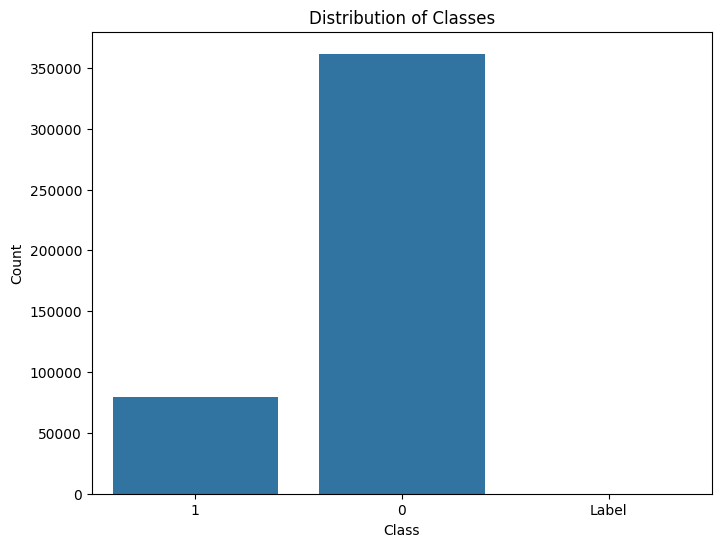

In [ ]:
# Install required libraries
!pip install matplotlib seaborn wordcloud

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import nltk

nltk.download('punkt')

# Load the dataset
df = pd.read_csv('HateSpeechDataset.csv')

# Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()




In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/drive/MyDrive/cleaned_dataset.csv'

df = pd.read_csv(file_path)
df.head()


<ipython-input-10-dd03938475f7>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Content,Label,Content_int,cleaned_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho


**Data Encoding Methods**

In [11]:
import pandas as pd



# Display the first few rows of the dataset
df.head(10)


,Content,Label,Content_int,cleaned_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho
5,yeah retard haha,1,"[146715, 49, 13, 50, 146714]",yeah retard haha
6,the ching chong chung stuff,1,"[146715, 3, 51, 52, 53, 54, 146714]",ching chong chung stuff
7,the dead what a slut still warm when she tweet...,1,"[146715, 3, 55, 56, 24, 57, 58, 59, 60, 61, 62...",dead slut still warm tweeted slut vagina mate ...
8,let your tweets be harmless it will not affect...,1,"[146715, 71, 72, 73, 5, 74, 63, 75, 76, 77, 78...",let tweet harmless affect way faggot one n
9,these latinos who have a problem with immigrat...,1,"[146715, 85, 86, 67, 87, 24, 88, 89, 90, 91, 9...",latino problem immigration enforcement stay sh...


In [12]:
df.describe()

,Content,Label,Content_int,cleaned_text
count,440906,440906,440906,440563
unique,417561,5,417561,407715
top,content,0,"[146715, 7139, 146714]",bitch
freq,7,207120,7,56


**Data** **Tokenization**

In [13]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Define a function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the function to the text column
df['tokenized_text'] = df['Content'].apply(tokenize_text)

# Display the first few rows with tokenized text
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Content,Label,Content_int,cleaned_text,tokenized_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...,"[denial, of, normal, the, con, be, asked, to, ..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...,"[just, by, being, able, to, tweet, this, insuf..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life,"[that, is, retarded, you, too, cute, to, be, s..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...,"[thought, of, a, real, badass, mongol, style, ..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho,"[afro, american, basho]"


In [14]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [43]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/tokenized_text.csv'

df = pd.read_csv(file_path)
df.head()

,Content,Label,Content_int,tokenized_text
0,denial of normal the con be asked to comment o...,1.0,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...","['denial', 'of', 'normal', 'the', 'con', 'be',..."
1,just by being able to tweet this insufferable ...,1.0,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...","['just', 'by', 'being', 'able', 'to', 'tweet',..."
2,that is retarded you too cute to be single tha...,1.0,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...","['that', 'is', 'retarded', 'you', 'too', 'cute..."
3,thought of a real badass mongol style declarat...,1.0,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...","['thought', 'of', 'a', 'real', 'badass', 'mong..."
4,afro american basho,1.0,"[146715, 46, 47, 48, 146714]","['afro', 'american', 'basho']"


Dataset splitting into traning and testing

In [49]:
df1 = df.sample(1000)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 213692 to 140277
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content         1000 non-null   object
 1   Label           1000 non-null   object
 2   Content_int     1000 non-null   object
 3   tokenized_text  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [58]:
df['tokenized_text'].head()

213692    ['what', 'is', 'happening', 'here', 'clearly',...
3209      ['i', 'would', 'and', 't', 'be', 'surprised', ...
71085     ['i', 'want', 'me', 'raising', 'hands', 'and',...
131783    ['is', 'there', 'enough', 'blue', 'in', 'the',...
14956     ['the', 'old', 'fool', 'proved', 'he', 'should...
Name: tokenized_text, dtype: object

In [59]:
df.head(3)

,Content,Label,Content_int,tokenized_text
213692,what is happening here clearly is taken care i...,1,"[146715, 56, 29, 2935, 501, 1405, 29, 2366, 59...","['what', 'is', 'happening', 'here', 'clearly',..."
3209,i would and t be surprised if i ve yelled and ...,0,"[146715, 80, 176, 111, 697, 5, 2164, 204, 80, ...","['i', 'would', 'and', 't', 'be', 'surprised', ..."
71085,i want me raising hands and i will do anything...,1,"[146715, 80, 110, 78, 1647, 1249, 111, 80, 75,...","['i', 'want', 'me', 'raising', 'hands', 'and',..."


Dataset word to vec

In [61]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np


word2vec_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

def average_word_vectors(tokens, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

df['word2vec'] = df['tokenized_text'].apply(lambda tokens: average_word_vectors(tokens, word2vec_model, 100))

print("Word2Vec Embeddings:\n", df[['Content', 'word2vec']])

Word2Vec Embeddings:
                                                   Content  \
213692  what is happening here clearly is taken care i...   
3209    i would and t be surprised if i ve yelled and ...   
71085   i want me raising hands and i will do anything...   
131783  is there enough blue in the wardrobe departmen...   
14956   the old fool proved he should not be leader of...   
...                                                   ...   
34246   i am not going to let a muslim ruin my life le...   
82438   yeah like that will really do it not what are ...   
70743   this is just so true in fact the uk has been q...   
156881  to poor and uncultivated going said zebedee i ...   
140277                             who is gay mr new idea   

                                                 word2vec  
213692  [-0.054080058, 0.113826625, -0.08201775, 0.073...  
3209    [-0.05163729, 0.120298, -0.08104163, 0.0680183...  
71085   [-0.04475947, 0.111461155, -0.07880544, 0.0765...  
13178

In [62]:
print(df['word2vec'].iloc[1])

[-0.05163729  0.120298   -0.08104163  0.06801832  0.22060522  0.10714716
 -0.01676509  0.18929356 -0.11868598  0.02581748 -0.07662337 -0.05545373
  0.14960884  0.06521685  0.06292754  0.00090218  0.21258377  0.2986105
 -0.18519798 -0.08362757 -0.18072852 -0.17826684 -0.00926832 -0.16699558
  0.07086074 -0.04850535  0.04861237  0.17677626 -0.06172172  0.18720005
  0.2042677  -0.12680683 -0.16317926  0.01031417 -0.10483641  0.01094058
  0.09250384  0.01355982  0.07851503  0.15153036  0.02451084 -0.04631686
 -0.03967896  0.05184717 -0.00324454  0.10691321  0.23132047 -0.18751682
 -0.11448929 -0.11171928  0.16396998 -0.18468848 -0.2158785  -0.10969426
 -0.22690944  0.01457032 -0.0290235  -0.00215916 -0.12398216 -0.10490232
 -0.0039513  -0.09625906  0.15156761 -0.0091631  -0.12120755  0.20056152
  0.19558087 -0.14485295 -0.17278494  0.15601672 -0.06935699 -0.10538261
  0.07877098  0.09216822 -0.15019809 -0.00351804 -0.00528757  0.07902575
 -0.07246199  0.09527991 -0.02978057 -0.0125608  -0.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 213692 to 140277
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content         1000 non-null   object
 1   Label           1000 non-null   object
 2   Content_int     1000 non-null   object
 3   tokenized_text  1000 non-null   object
 4   word2vec        1000 non-null   object
dtypes: object(5)
memory usage: 46.9+ KB


In [64]:
df1 = df.sample(1000)

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 194580 to 24009
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content         1000 non-null   object
 1   Label           1000 non-null   object
 2   Content_int     1000 non-null   object
 3   tokenized_text  1000 non-null   object
 4   word2vec        1000 non-null   object
dtypes: object(5)
memory usage: 46.9+ KB


In [78]:
# Convert the 'Label' column to a consistent data type (e.g., string)
df['Label'] = df['Label'].astype(str)

# Features and labels
X = df['Content']
y = df['Label']

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizing using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Data** **Balancing**

In [80]:
from imblearn.over_sampling import SMOTE

# applied to balance a data  which makes model to predict actual score
smote = SMOTE(random_state=42) # Smote is statistical technique to balnce a dataset
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

**Logistic Regression Model**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# A Classification Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluating the  model
print("Logistic Regression Model")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Model
[[130  18]
 [ 29  23]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       148
           1       0.56      0.44      0.49        52

    accuracy                           0.77       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.75      0.77      0.76       200



TF-IDF Matrix


TF-IDF Embeddings Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       148
           1       1.00      0.13      0.24        52

    accuracy                           0.78       200
   macro avg       0.88      0.57      0.55       200
weighted avg       0.83      0.78      0.70       200

Accuracy: 0.775
Precision: 0.827461139896373
Recall: 0.775
F1 Score: 0.7040409563099556


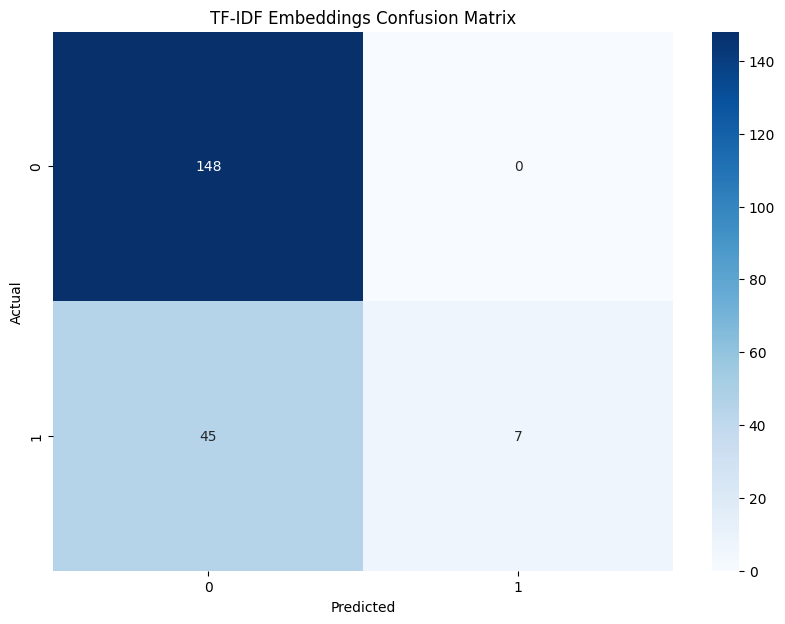

AUC-ROC: 0.6907484407484408


In [85]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")

TF Matrix


Term Frequency Embeddings Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       148
           1       0.55      0.31      0.40        52

    accuracy                           0.76       200
   macro avg       0.67      0.61      0.62       200
weighted avg       0.73      0.76      0.73       200

Accuracy: 0.755
Precision: 0.7276588021778585
Recall: 0.755
F1 Score: 0.72904833778397


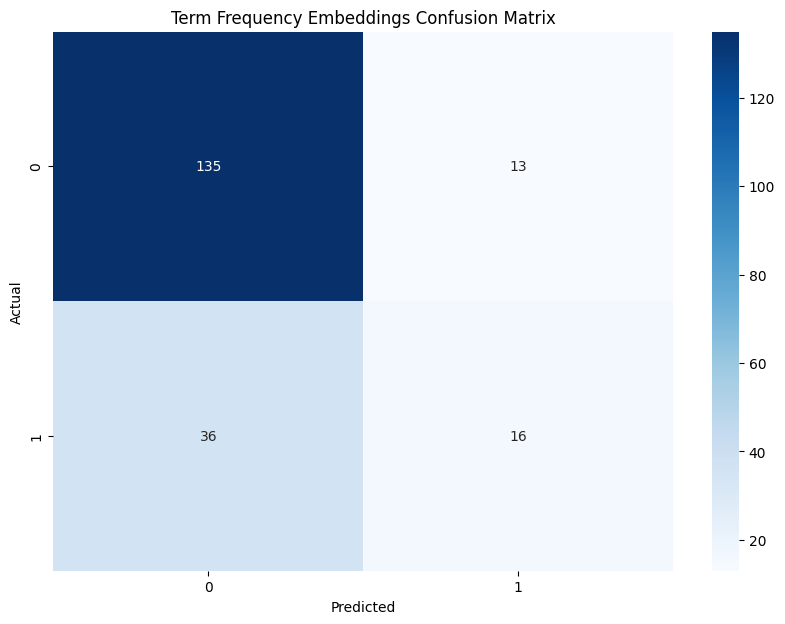

AUC-ROC: 0.6508575883575883


In [86]:
tf_vectorizer = CountVectorizer(max_features=1000)
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)
train_and_evaluate(X_train_tf, X_test_tf, y_train, y_test, "Term Frequency")

**Naive Bayes Classifier Model**

In [82]:
from sklearn.naive_bayes import MultinomialNB

# Training the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluating the Naive Bayes model
print("Naive Bayes Model")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model
[[112  36]
 [ 23  29]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       148
           1       0.45      0.56      0.50        52

    accuracy                           0.70       200
   macro avg       0.64      0.66      0.64       200
weighted avg       0.73      0.70      0.71       200



Word To Vec Matrix


Word2Vec Embeddings Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       148
           1       0.00      0.00      0.00        52

    accuracy                           0.74       200
   macro avg       0.37      0.50      0.43       200
weighted avg       0.55      0.74      0.63       200

Accuracy: 0.74
Precision: 0.5476
Recall: 0.74
F1 Score: 0.6294252873563217


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

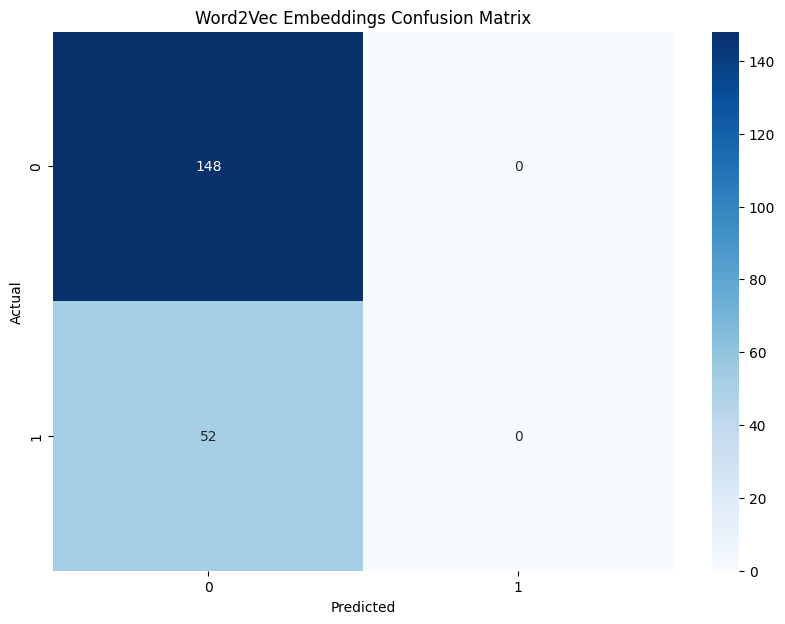

AUC-ROC: 0.533004158004158


In [89]:
word2vec_model = Word2Vec(sentences=df['Content'], vector_size=100, window=5, min_count=1, workers=4)
def average_word_vectors(tokens, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

X_train_word2vec = np.array([average_word_vectors(tokens, word2vec_model, 100) for tokens in df.loc[X_train.index, 'Content']])
X_test_word2vec = np.array([average_word_vectors(tokens, word2vec_model, 100) for tokens in df.loc[X_test.index, 'Content']])
train_and_evaluate(X_train_word2vec, X_test_word2vec, y_train, y_test, "Word2Vec")

Support Vector Machine

In [83]:
from sklearn.svm import SVC
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, encoder_name):
    model = SVC(probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{encoder_name} Embeddings Performance with SVM:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{encoder_name} Embeddings Confusion Matrix with SVM")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if len(set(y_test)) == 2:
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print("AUC-ROC:", roc_auc)


TF-IDF Embeddings Performance with SVM:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       148
           1       1.00      0.04      0.07        52

    accuracy                           0.75       200
   macro avg       0.87      0.52      0.46       200
weighted avg       0.81      0.75      0.65       200

Accuracy: 0.75
Precision: 0.8131313131313133
Recall: 0.75
F1 Score: 0.6523228430742882


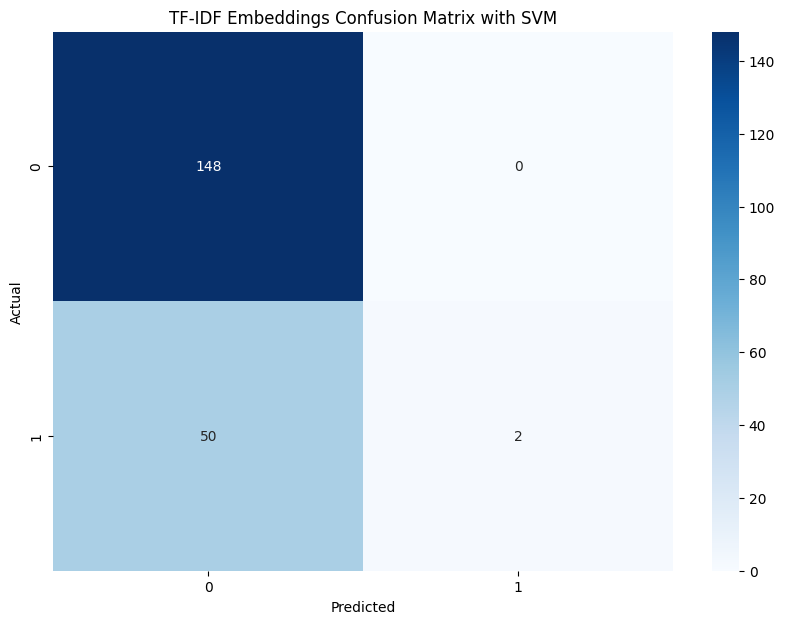

AUC-ROC: 0.6936070686070688


In [84]:
train_and_evaluate_svm(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")